In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv('Heart.csv')
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [44]:
df = data.iloc[:,1:]
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [45]:
for i in df:
    print(i)

Age
Sex
ChestPain
RestBP
Chol
Fbs
RestECG
MaxHR
ExAng
Oldpeak
Slope
Ca
Thal
AHD


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [47]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [48]:
df.dropna(inplace=True)

In [49]:
import plotly.express as px

In [50]:
fig = px.funnel_area(data_frame=df,names='ChestPain')
fig.show()

In [51]:
fig = px.funnel_area(data_frame=df,names='Thal')
fig.show()

In [52]:
px.box(data_frame=df,x='Thal',y='RestBP')

In [53]:
import seaborn as sns

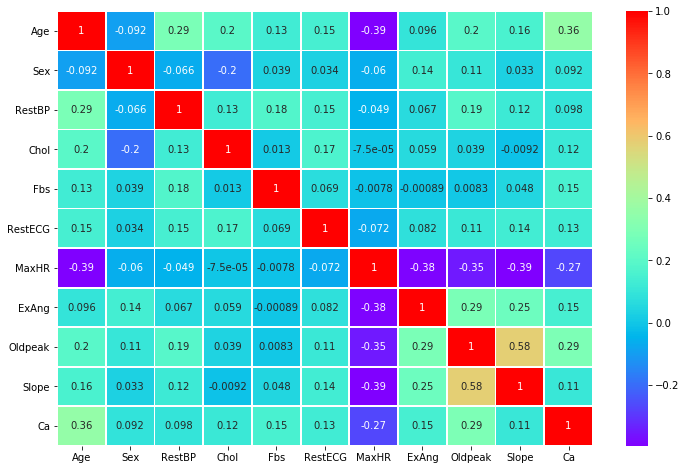

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='rainbow',linewidths=0.8)

In [55]:
px.pie(data_frame=df,names='Sex')

In [56]:
px.scatter(data_frame=df,x='RestBP',y='Chol',size='RestBP',color='AHD')

In [57]:
px.scatter(data_frame=df,x='RestBP',y='Chol',size='RestBP',color='Sex')

In [58]:
px.scatter(data_frame=df,x='RestBP',y='Chol',size='RestBP',color='Thal')

In [59]:
px.scatter(data_frame=df,x='RestBP',y='Chol',size='RestBP',color='ChestPain')

In [60]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [61]:
df.ChestPain.unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [62]:
df.Thal.unique()

array(['fixed', 'normal', 'reversable'], dtype=object)

In [63]:
df.AHD.value_counts()

No     160
Yes    137
Name: AHD, dtype: int64

In [64]:
df.AHD.replace({'No':0,'Yes':1},inplace=True)
df.Thal.replace({'fixed':0, 'normal':1, 'reversable':2},inplace=True)

In [65]:
df.ChestPain.replace({'typical':0, 'asymptomatic':1, 'nonanginal':2, 'nontypical':3},inplace=True)

In [66]:
y = df[['AHD']]
y.head()

,AHD
0,0
1,1
2,1
3,0
4,0


In [67]:
df.drop('AHD',axis=1,inplace=True)

In [68]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1


In [69]:
X = df.copy()

In [70]:
X.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1


## Ensemble Model

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [73]:
RF = RandomForestClassifier().fit(X_train,y_train)

In [74]:
RF_predict = RF.predict(X_test)

In [75]:
Ada = AdaBoostClassifier().fit(X_train,y_train)

In [76]:
Ada_predict = Ada.predict(X_test)

In [77]:
GB = GradientBoostingClassifier().fit(X_train,y_train)

In [78]:
GB_predict = GB.predict(X_test)

In [79]:
XGB = XGBClassifier().fit(X_train,y_train)

In [80]:
XGB_predict = XGB.predict(X_test)

In [81]:
XGBRF = XGBRFClassifier().fit(X_train,y_train)

In [83]:
XGBRF_predict = XGBRF.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix,classification_report

## Performance of Random Forest

In [86]:
print('Confusion Matrix is :')
print(confusion_matrix(RF_predict,y_test))
print('\n')
print('Classification Report is :')
print(classification_report(RF_predict,y_test))

Confusion Matrix is :
[[43  9]
 [ 6 32]]


Classification Report is :
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        52
           1       0.78      0.84      0.81        38

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90



## Performance of Adaboost

In [87]:
print('Confusion Matrix is :')
print(confusion_matrix(Ada_predict,y_test))
print('\n')
print('Classification Report is :')
print(classification_report(Ada_predict,y_test))

Confusion Matrix is :
[[43  7]
 [ 6 34]]


Classification Report is :
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        50
           1       0.83      0.85      0.84        40

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90



## Performance of Gradient Boosting

In [88]:
print('Confusion Matrix is :')
print(confusion_matrix(GB_predict,y_test))
print('\n')
print('Classification Report is :')
print(classification_report(GB_predict,y_test))

Confusion Matrix is :
[[41  8]
 [ 8 33]]


Classification Report is :
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        49
           1       0.80      0.80      0.80        41

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



## Performance of Xgboost

In [89]:
print('Confusion Matrix is :')
print(confusion_matrix(XGB_predict,y_test))
print('\n')
print('Classification Report is :')
print(classification_report(XGB_predict,y_test))

Confusion Matrix is :
[[41  8]
 [ 8 33]]


Classification Report is :
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        49
           1       0.80      0.80      0.80        41

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



## Performance of XGRF

In [90]:
print('Confusion Matrix is :')
print(confusion_matrix(XGBRF_predict,y_test))
print('\n')
print('Classification Report is :')
print(classification_report(XGBRF_predict,y_test))

Confusion Matrix is :
[[39  9]
 [10 32]]


Classification Report is :
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        48
           1       0.78      0.76      0.77        42

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90



## Non Ensemble Models

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [92]:
logistic = LogisticRegression().fit(X_train,y_train)
logistic_predict = logistic.predict(X_test)

In [93]:
decision_tree = DecisionTreeClassifier().fit(X_train,y_train)
decision_tree_predict = decision_tree.predict(X_test)

In [94]:
KNN = KNeighborsClassifier().fit(X_train,y_train)
KNN_predict = KNN.predict(X_test)

In [95]:
svm = SVC().fit(X_train,y_train)
svm_predict = svm.predict(X_test)

## Performance of Logistic

In [96]:
print('Confusion Matrix is :')
print(confusion_matrix(logistic_predict,y_test))
print('\n')
print('Classification Report is :')
print(classification_report(logistic_predict,y_test))

Confusion Matrix is :
[[45  9]
 [ 4 32]]


Classification Report is :
              precision    recall  f1-score   support

           0       0.92      0.83      0.87        54
           1       0.78      0.89      0.83        36

    accuracy                           0.86        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.86      0.86      0.86        90



## Performance of Decision Tree

In [97]:
print('Confusion Matrix is :')
print(confusion_matrix(decision_tree_predict,y_test))
print('\n')
print('Classification Report is :')
print(classification_report(decision_tree_predict,y_test))

Confusion Matrix is :
[[38  9]
 [11 32]]


Classification Report is :
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        47
           1       0.78      0.74      0.76        43

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



## Performance of KNN

In [98]:
print('Confusion Matrix is :')
print(confusion_matrix(KNN_predict,y_test))
print('\n')
print('Classification Report is :')
print(classification_report(KNN_predict,y_test))

Confusion Matrix is :
[[37 16]
 [12 25]]


Classification Report is :
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        53
           1       0.61      0.68      0.64        37

    accuracy                           0.69        90
   macro avg       0.68      0.69      0.68        90
weighted avg       0.70      0.69      0.69        90



## Performance of SVM

In [99]:
print('Confusion Matrix is :')
print(confusion_matrix(svm_predict,y_test))
print('\n')
print('Classification Report is :')
print(classification_report(svm_predict,y_test))

Confusion Matrix is :
[[44 25]
 [ 5 16]]


Classification Report is :
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        69
           1       0.39      0.76      0.52        21

    accuracy                           0.67        90
   macro avg       0.64      0.70      0.63        90
weighted avg       0.78      0.67      0.69        90

